<a href="https://colab.research.google.com/github/ivansst773/Aprendizaje_de_Maquina/blob/main/Proyecto/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clasificación de diagnósticos oftalmológicos mediante aprendizaje automático sobre señales PERG

Universidad Nacional de Colombia - Sede Manizales

Edgar Ivan Calpa Cuacialpud

Teoría de aprendizaje de máquina - 2025-1

Profesor: Andrés Marino Álvarez Meza, PhD

Departamento de ingeniería eléctrica, electrónica y computación

🚀 Vamos a construir un modelo de clasificación para predecir diagnosis1 con base en las mediciones PERG y los datos clínicos


🔹 📍 ¿Qué es un modelo de clasificación en Machine Learning?

✅ Un modelo de clasificación es un algoritmo que aprende a asignar etiquetas a datos nuevos, basándose en patrones encontrados en datos previos.

✅ En nuestro caso, el modelo analizará las mediciones PERG (RE_1, LE_1, RE_2, etc.) junto con variables clínicas (age_years, va_re_logMar, etc.) para predecir el diagnóstico (diagnosis1).

✅ La meta es que, dado un nuevo paciente con sus mediciones, el modelo pueda decir qué diagnóstico es más probable.


# ✅ La meta es que, dado un nuevo paciente con sus mediciones, el modelo pueda decir qué diagnóstico es más probable.

🔹 📍 Tipos de modelos de clasificación
Existen muchos algoritmos de clasificación, pero aquí hay algunos populares:

📌 Random Forest → Usa múltiples árboles de decisión para mejorar la precisión.

📌 Red Neuronal Artificial (MLP) → Aprende patrones en datos complejos, similar a cómo lo hace el cerebro humano.

📌 Regresión Logística → Modelo estadístico simple pero efectivo para problemas binarios o multinivel.

📌 K-Nearest Neighbors (KNN) → Predice en función de los datos más cercanos en el espacio de características.

📌 Support Vector Machines (SVM) → Encuentra la mejor separación entre clases con hiperplanos en dimensiones múltiples.


🔹 📍 ¿Cómo funciona el aprendizaje en un modelo de clasificación?

🔹 Fase de entrenamiento:

✅ Se le dan datos etiquetados al modelo (X_train con mediciones + y_train con diagnosis1).

✅ El modelo encuentra patrones en los datos y ajusta sus parámetros internos.

🔹 Fase de predicción:

✅ Con nuevos datos (X_test), el modelo usa lo aprendido para asignar un diagnóstico (y_pred).

✅ Se compara con los valores reales (y_test) y se mide la precisión del modelo.

🔹 Evaluación del modelo:

✅ Se usan métricas como accuracy, precision, recall y F1-score para medir su desempeño.

✅ También podemos usar una matriz de confusión para ver cuántas predicciones fueron correctas o incorrectas.


🔹 📍 ¿Cuál usamos en este proyecto?

📌 Random Forest es una gran opción inicial porque es preciso, fácil de interpretar y funciona bien con datos tabulares.


🔹 📍 Código para preparar los datos


In [1]:
!pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=89c62078ad8fb3c2c1249d8293567644f2c48a8ec615a5bed4755f522959f6c1
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


conectar tu Google Drive:


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


descomprimir todos los archivos dentro del ZIP

In [11]:
import zipfile
import os

ruta_zip = "/content/drive/MyDrive/Semestre2025_1/Teoria de aprendizaje de maquina /a-comprehensive-dataset-of-pattern-electroretinograms-for-ocular-electrophysiology-research-the-perg-ioba-dataset-1.0.0.zip"
ruta_destino = "/content/perg-ioba-dataset/"  # Carpeta de extracción

# Extraer el archivo ZIP
with zipfile.ZipFile(ruta_zip, 'r') as zip_ref:
    zip_ref.extractall(ruta_destino)

print("Archivos extraídos en:", ruta_destino)
print(os.listdir(ruta_destino))  # Verifica los archivos dentro de la carpeta extraída

Archivos extraídos en: /content/perg-ioba-dataset/
['a-comprehensive-dataset-of-pattern-electroretinograms-for-ocular-electrophysiology-research-the-perg-ioba-dataset-1.0.0']


In [12]:
import os

ruta_destino = "/content/perg-ioba-dataset/"
csv_encontrados = []

# Recorrer todo el árbol de carpetas
for root, dirs, files in os.walk(ruta_destino):
    for file in files:
        if file.lower().endswith(".csv"):
            ruta_csv = os.path.join(root, file)
            csv_encontrados.append(ruta_csv)
            print("📄 CSV encontrado:", ruta_csv)

print(f"\n🔎 Total de archivos CSV encontrados: {len(csv_encontrados)}")


📄 CSV encontrado: /content/perg-ioba-dataset/a-comprehensive-dataset-of-pattern-electroretinograms-for-ocular-electrophysiology-research-the-perg-ioba-dataset-1.0.0/csv/0294.csv
📄 CSV encontrado: /content/perg-ioba-dataset/a-comprehensive-dataset-of-pattern-electroretinograms-for-ocular-electrophysiology-research-the-perg-ioba-dataset-1.0.0/csv/0237.csv
📄 CSV encontrado: /content/perg-ioba-dataset/a-comprehensive-dataset-of-pattern-electroretinograms-for-ocular-electrophysiology-research-the-perg-ioba-dataset-1.0.0/csv/0235.csv
📄 CSV encontrado: /content/perg-ioba-dataset/a-comprehensive-dataset-of-pattern-electroretinograms-for-ocular-electrophysiology-research-the-perg-ioba-dataset-1.0.0/csv/0106.csv
📄 CSV encontrado: /content/perg-ioba-dataset/a-comprehensive-dataset-of-pattern-electroretinograms-for-ocular-electrophysiology-research-the-perg-ioba-dataset-1.0.0/csv/0019.csv
📄 CSV encontrado: /content/perg-ioba-dataset/a-comprehensive-dataset-of-pattern-electroretinograms-for-ocular-

procesa archivos CSV de mediciones PERG y les asigna un identificador (id_record) basado en el nombre del archivo.

📌 Resultado:

✅ Cada archivo CSV se convierte en un DataFrame con su información de medición y su identificador único (id_record).

✅ Permite unir todos los datos en df_mediciones para su análisis posterior.


#PASO 3: Combinar todos los CSV en un solo DataFrame

In [13]:
import pandas as pd

dataframes = []

for file in csv_encontrados:
    if "participants_info" in file:
        continue  # excluye archivo general

    id_record = os.path.basename(file).replace(".csv", "")
    try:
        df = pd.read_csv(file)
        df["id_record"] = int(id_record)
        dataframes.append(df)
    except Exception as e:
        print(f"⚠️ Error al procesar {file}: {e}")

# Combinar
df_mediciones = pd.concat(dataframes, ignore_index=True)
print(f"✅ Registros combinados: {df_mediciones.shape}")
df_mediciones.head()


✅ Registros combinados: (85680, 16)


,TIME_1,RE_1,LE_1,TIME_2,RE_2,LE_2,id_record,TIME_3,RE_3,LE_3,TIME_4,RE_4,LE_4,TIME_5,RE_5,LE_5
0,2006-06-17 10:29:03.0000,0.0,0.0,2006-06-17 10:30:32.0000,0.0,0.0,294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-06-17 10:29:03.0006,0.0,-0.3,2006-06-17 10:30:32.0006,0.0,-0.1,294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-06-17 10:29:03.0012,-0.1,-0.3,2006-06-17 10:30:32.0012,-0.4,-0.2,294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006-06-17 10:29:03.0018,-0.1,-0.5,2006-06-17 10:30:32.0018,-0.5,-0.2,294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006-06-17 10:29:03.0024,-0.1,-0.6,2006-06-17 10:30:32.0024,-0.4,-0.2,294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#🧩 PASO 4: Cargar datos clínicos (si usas participants_info.csv)

In [14]:
ruta_info = [f for f in csv_encontrados if "participants_info" in f][0]
df_info = pd.read_csv(ruta_info)
print(df_info.head())


   id_record        date  age_years     sex  \
0          1  2016-09-15         13    Male   
1          2  2005-09-15         13  Female   
2          3  2019-08-08         49  Female   
3          4  2004-12-16         43  Female   
4          5  2016-07-13         47  Female   

                              diagnosis1  \
0                                 Normal   
1  Congenital stationary night blindness   
2                       Orbital ischemia   
3                   Retinitis pigmentosa   
4                                 Normal   

                                     diagnosis2 diagnosis3  va_re_logMar  \
0                                           NaN        NaN         -0.08   
1                                           NaN        NaN          0.18   
2  Systemic disorder with ocular manifestations        NaN          0.26   
3                                           NaN        NaN           NaN   
4                                           NaN        NaN          0.10

#🧩 PASO 5: Unir df_mediciones + df_info por id_record (si aplica)

In [15]:
df_completo = pd.merge(df_mediciones, df_info, on="id_record")
print(f"🧠 Datos combinados: {df_completo.shape}")
df_completo.head()


🧠 Datos combinados: (85680, 27)


,TIME_1,RE_1,LE_1,TIME_2,RE_2,LE_2,id_record,TIME_3,RE_3,LE_3,...,age_years,sex,diagnosis1,diagnosis2,diagnosis3,va_re_logMar,va_le_logMar,unilateral,rep_record,comments
0,2006-06-17 10:29:03.0000,0.0,0.0,2006-06-17 10:30:32.0000,0.0,0.0,294,NaN,NaN,NaN,...,23,Male,Anisometropic amblyopia,NaN,NaN,0.98,0.14,RE,NaN,NaN
1,2006-06-17 10:29:03.0006,0.0,-0.3,2006-06-17 10:30:32.0006,0.0,-0.1,294,NaN,NaN,NaN,...,23,Male,Anisometropic amblyopia,NaN,NaN,0.98,0.14,RE,NaN,NaN
2,2006-06-17 10:29:03.0012,-0.1,-0.3,2006-06-17 10:30:32.0012,-0.4,-0.2,294,NaN,NaN,NaN,...,23,Male,Anisometropic amblyopia,NaN,NaN,0.98,0.14,RE,NaN,NaN
3,2006-06-17 10:29:03.0018,-0.1,-0.5,2006-06-17 10:30:32.0018,-0.5,-0.2,294,NaN,NaN,NaN,...,23,Male,Anisometropic amblyopia,NaN,NaN,0.98,0.14,RE,NaN,NaN
4,2006-06-17 10:29:03.0024,-0.1,-0.6,2006-06-17 10:30:32.0024,-0.4,-0.2,294,NaN,NaN,NaN,...,23,Male,Anisometropic amblyopia,NaN,NaN,0.98,0.14,RE,NaN,NaN


#🧩 PASO 6: Preparar datos para el modelo

1. Selección de columnas útiles
Vamos a tomar señales, edad, sexo y diagnóstico principal. Puedes ajustar esta selección según tus hipótesis:

In [16]:
# Columnas de entrada (features)
X_cols = ['RE_1', 'LE_1', 'RE_2', 'LE_2', 'RE_3', 'LE_3', 'age_years', 'sex']

# Columna objetivo (target)
y_col = 'diagnosis1'


2. Validar y limpiar
Codificamos sexo y diagnóstico, y eliminamos filas incompletas para entrenar bien:

In [17]:
from sklearn.preprocessing import LabelEncoder

# Solo columnas necesarias
df_modelo = df_completo[X_cols + [y_col]].dropna()

# Codificar variables categóricas
le_sex = LabelEncoder()
df_modelo['sex'] = le_sex.fit_transform(df_modelo['sex'])

le_diag = LabelEncoder()
df_modelo[y_col] = le_diag.fit_transform(df_modelo[y_col])

print(f"📦 Dataset final para modelar: {df_modelo.shape}")
df_modelo.head()


📦 Dataset final para modelar: (11985, 9)


,RE_1,LE_1,RE_2,LE_2,RE_3,LE_3,age_years,sex,diagnosis1
255,0.0,0.0,0.0,0.0,0.0,0.0,7,0,3
256,0.1,0.2,0.0,0.8,-0.2,-0.1,7,0,3
257,0.2,0.2,0.0,1.0,-0.5,-0.2,7,0,3
258,0.3,0.3,0.2,1.3,-0.8,-0.2,7,0,3
259,0.3,0.5,0.6,1.5,-0.9,-0.2,7,0,3


🔹 3. Separar en entrenamiento y prueba

In [18]:
from sklearn.model_selection import train_test_split

X = df_modelo[X_cols]
y = df_modelo[y_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"🧪 Train shape: {X_train.shape}, Test shape: {X_test.shape}")


🧪 Train shape: (9588, 8), Test shape: (2397, 8)


🔹 4. Normalizar entradas

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#🧠 PASO 7: Entrenar modelo RandomForest y evaluar

📌 Accuracy: 0.9970796829370046
📌 F1 Score (macro): 0.9976210120195302
📝 Reporte de clasificación:
                                 precision    recall  f1-score   support

  Age related choroidal atrophy       1.00      1.00      1.00        51
         Autoimmune retinopathy       0.99      1.00      1.00       159
  Bilateral optic nerve atrophy       1.00      0.98      0.99        50
Central nervous system disorder       1.00      1.00      1.00        54
Chorioretinopathy Birdshot type       1.00      1.00      1.00       101
             Cone-Rod dystrophy       1.00      1.00      1.00        41
       Congenital Achromatopsia       1.00      1.00      1.00        53
       Congenital achromatopsia       1.00      1.00      1.00        52
       External ophthalmoplegia       1.00      1.00      1.00        60
              Macular dystrophy       0.99      1.00      1.00       153
                         Normal       1.00      0.99      1.00       710
               Optic neur

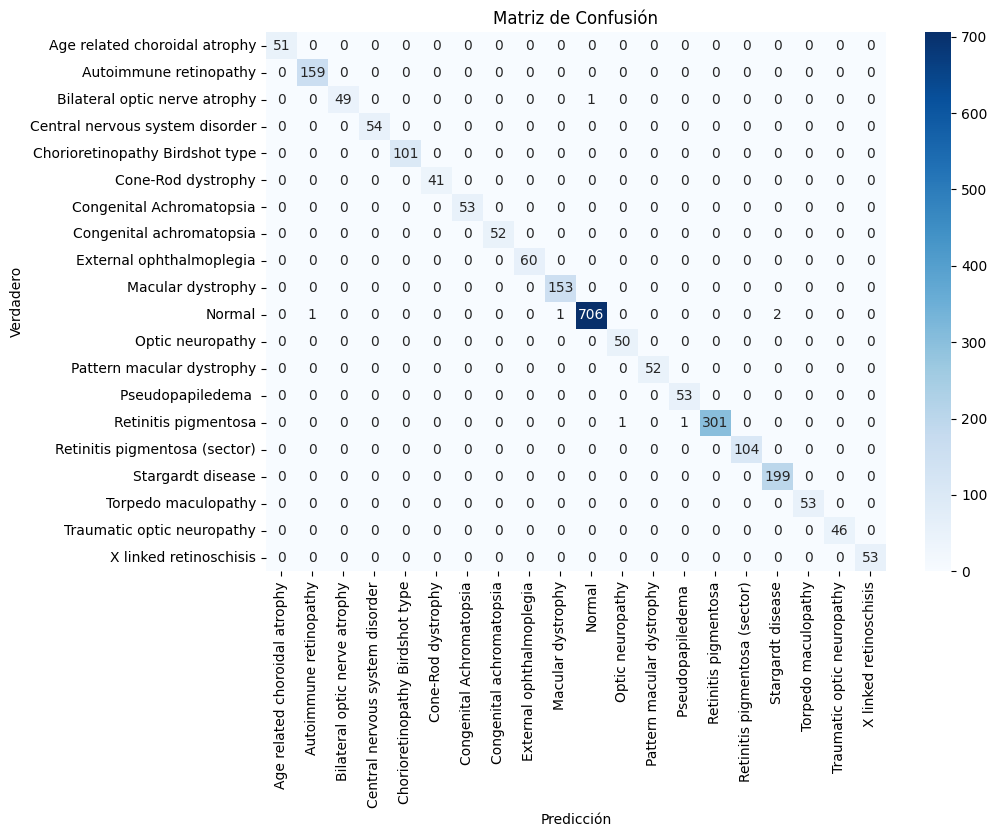

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 🟢 Entrenamiento
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# 🔍 Predicciones
y_pred = clf.predict(X_test_scaled)

# 📊 Métricas
print("📌 Accuracy:", accuracy_score(y_test, y_pred))
print("📌 F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

# 🧾 Reporte por clase
print("📝 Reporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=le_diag.classes_))

# 🎨 Matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=le_diag.classes_, yticklabels=le_diag.classes_)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()


#📦 PASO 8: Exportar resultados como artefacto reproducible

In [21]:
df_resultados = X_test.copy()
df_resultados['y_true'] = le_diag.inverse_transform(y_test)
df_resultados['y_pred'] = le_diag.inverse_transform(y_pred)
df_resultados.head()


,RE_1,LE_1,RE_2,LE_2,RE_3,LE_3,age_years,sex,y_true,y_pred
6315,3.0,1.8,3.7,2.1,0.3,1.5,47,0,Normal,Normal
70619,-3.1,-1.1,-2.5,-1.2,-1.9,-2.8,59,1,Retinitis pigmentosa,Retinitis pigmentosa
27496,-2.1,-0.8,-2.0,-2.3,-5.6,-2.4,22,0,Stargardt disease,Stargardt disease
44230,2.8,4.6,-0.2,4.7,2.2,2.5,25,0,Normal,Normal
1574,0.3,-0.6,-0.3,-0.1,1.0,1.0,52,1,Bilateral optic nerve atrophy,Bilateral optic nerve atrophy


#Guardar matriz de confusión como imagen .png

✅ Imagen guardada en: /content/drive/MyDrive/Semestre2025_1/confusion_matrix_random_forest.png


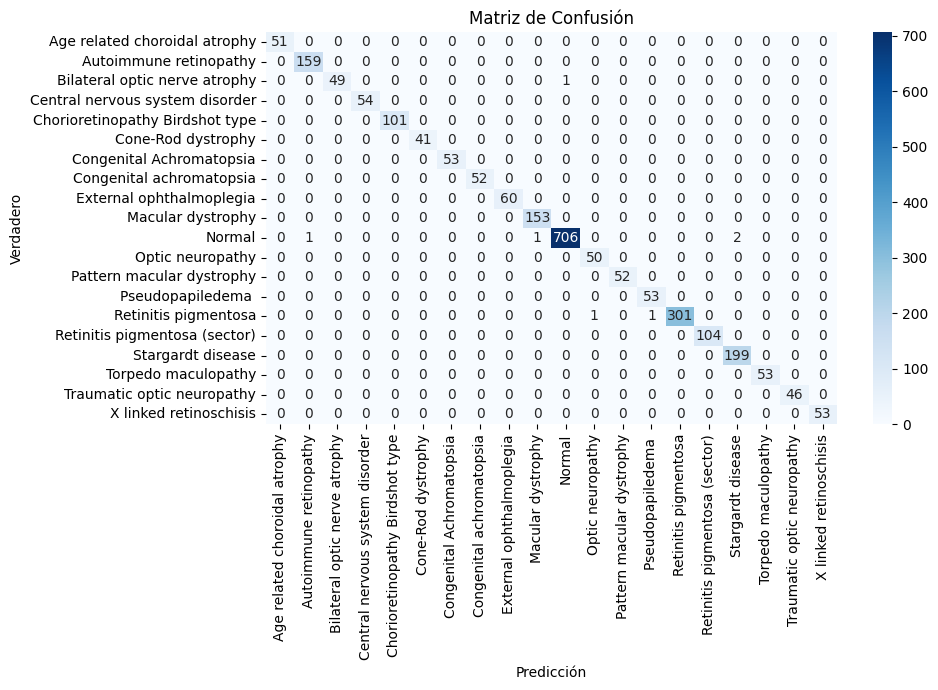

In [22]:
# Guardar figura como archivo
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=le_diag.classes_, yticklabels=le_diag.classes_)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.tight_layout()
ruta_imagen = "/content/drive/MyDrive/Semestre2025_1/confusion_matrix_random_forest.png"
plt.savefig(ruta_imagen)
print(f"✅ Imagen guardada en: {ruta_imagen}")


#Guardar métricas como archivo .csv

In [23]:
# Crear DataFrame con métricas por clase
reporte_dict = classification_report(y_test, y_pred, target_names=le_diag.classes_, output_dict=True)
df_metrics = pd.DataFrame(reporte_dict).transpose()

ruta_metrics = "/content/drive/MyDrive/Semestre2025_1/metrics_random_forest.csv"
df_metrics.to_csv(ruta_metrics, index=True)
print(f"✅ Métricas guardadas en: {ruta_metrics}")
df_metrics.head()


✅ Métricas guardadas en: /content/drive/MyDrive/Semestre2025_1/metrics_random_forest.csv


,precision,recall,f1-score,support
Age related choroidal atrophy,1.00000,1.00,1.000000,51.0
Autoimmune retinopathy,0.99375,1.00,0.996865,159.0
Bilateral optic nerve atrophy,1.00000,0.98,0.989899,50.0
Central nervous system disorder,1.00000,1.00,1.000000,54.0
Chorioretinopathy Birdshot type,1.00000,1.00,1.000000,101.0


#🔍 PASO 9: Análisis de importancia de variables (feature importance)

Este gráfico puede explicar qué señales PERG o metadatos clínicos fueron más relevantes para la clasificación 🔬.

/tmp/ipython-input-24-128512023.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=df_importancia, palette='viridis')


📊 Imagen guardada en: /content/drive/MyDrive/Semestre2025_1/feature_importance_rf.png


,feature,importance
6,age_years,0.352329
4,RE_3,0.112762
3,LE_2,0.104564
0,RE_1,0.097316
5,LE_3,0.096866
1,LE_1,0.095417
2,RE_2,0.089692
7,sex,0.051056


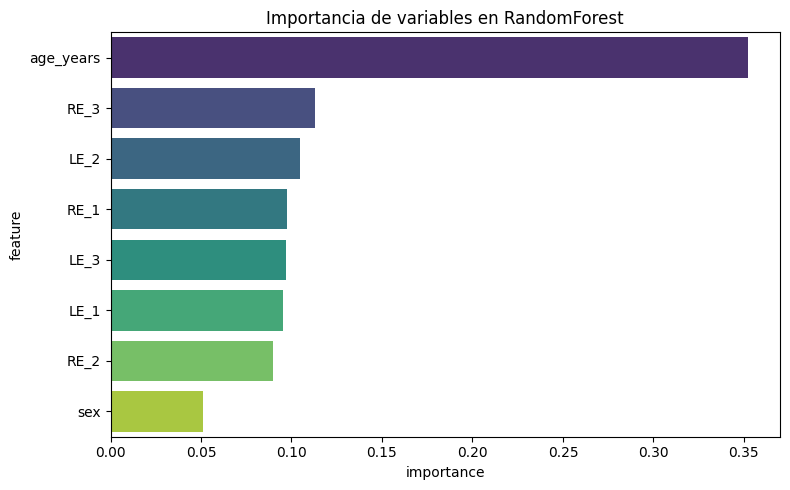

In [24]:
# Importancia de variables
importances = clf.feature_importances_
df_importancia = pd.DataFrame({
    'feature': X_cols,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Visualizar
plt.figure(figsize=(8, 5))
sns.barplot(x='importance', y='feature', data=df_importancia, palette='viridis')
plt.title("Importancia de variables en RandomForest")
plt.tight_layout()

# Guardar como imagen
ruta_imp = "/content/drive/MyDrive/Semestre2025_1/feature_importance_rf.png"
plt.savefig(ruta_imp)
print(f"📊 Imagen guardada en: {ruta_imp}")
df_importancia


#📎 PASO 10 (opcional): Guardar todo en artefacto reproducible

Exportar predicciones puede servirte para mostrar ejemplos en slides o incluso para compartir con profes/evaluadores.

In [25]:
df_resultados.to_csv("/content/drive/MyDrive/Semestre2025_1/predicciones_random_forest.csv", index=False)
print("✅ Predicciones exportadas.")


✅ Predicciones exportadas.


#📂 PASO 11: Generar un informe técnico reproducible (Markdown o PDF)

In [26]:
from fpdf import FPDF

pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)

pdf.set_title("Informe técnico: clasificación Random Forest - PERG Dataset")

pdf.cell(200, 10, txt="Proyecto de clasificación con Random Forest", ln=True, align='L')
pdf.cell(200, 10, txt=f"Registros usados: {df_modelo.shape[0]}", ln=True, align='L')
pdf.cell(200, 10, txt=f"Accuracy: {accuracy_score(y_test, y_pred):.2f}", ln=True, align='L')
pdf.cell(200, 10, txt=f"F1 Score macro: {f1_score(y_test, y_pred, average='macro'):.2f}", ln=True, align='L')

pdf.output("/content/drive/MyDrive/Semestre2025_1/informe_rf.pdf")
print("✅ PDF generado y guardado.")


✅ PDF generado y guardado.


#🧪 PASO 12: Validación cruzada (opcional)

In [27]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, scaler.fit_transform(X), y, cv=5)
print(f"📉 Validación cruzada (5 folds):\nAccuracy promedio: {scores.mean():.3f}")


📉 Validación cruzada (5 folds):
Accuracy promedio: 0.681


#🔹 Paso 13 — Entrenar Regresión Logística Multiclase y MLP

📌 Regresión Logística Multiclase

In [28]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, random_state=42)
log_clf.fit(X_train_scaled, y_train)
y_pred_log = log_clf.predict(X_test_scaled)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


📌 MLPClassifier (Perceptrón Multicapa)

In [29]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_clf.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_clf.predict(X_test_scaled)


#🔹 Paso 14 — Evaluar ambos modelos
evaluar Regresión Logística Multiclase y MLPClassifier, reutilizando lo que ya hiciste para Random Forest

🔹 📊 Evaluar Regresión Logística Multiclase

📌 Regresión Logística Multiclase
Accuracy: 0.5953274926992074
F1 Score (macro): 0.6486798048295984
F1 Score (weighted): 0.5790103831064912

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.28      0.12      0.17       159
           2       1.00      0.24      0.39        50
           3       1.00      0.98      0.99        54
           4       0.67      0.71      0.69       101
           5       1.00      0.80      0.89        41
           6       0.90      0.85      0.87        53
           7       0.98      1.00      0.99        52
           8       0.63      0.43      0.51        60
           9       0.36      0.30      0.33       153
          10       0.50      0.77      0.61       710
          11       0.63      0.48      0.55        50
          12       0.89      0.94      0.92        52
          13       0.69      0.21      0.32        53
          14       0.65      0.59      0.62     

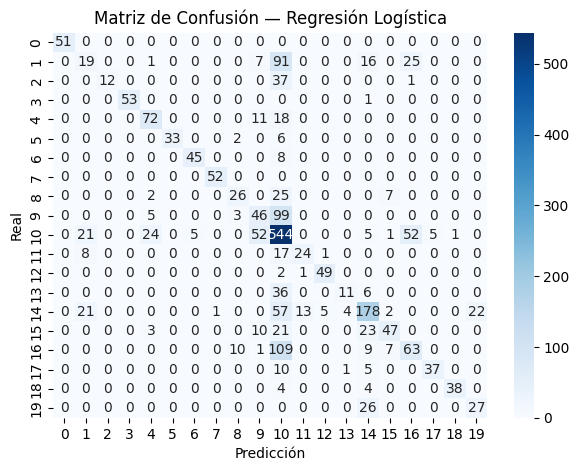

In [30]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluación
print("📌 Regresión Logística Multiclase")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("F1 Score (macro):", f1_score(y_test, y_pred_log, average='macro'))
print("F1 Score (weighted):", f1_score(y_test, y_pred_log, average='weighted'))
print("\n", classification_report(y_test, y_pred_log))

# Matriz de confusión
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión — Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.savefig("matriz_logistica.png")  # Guardar como PNG
plt.show()


🔹 🤖 Evaluar Perceptrón Multicapa (MLPClassifier)

📌 Perceptrón Multicapa (MLPClassifier)
Accuracy: 0.9954109303295786
F1 Score (macro): 0.995533122534753
F1 Score (weighted): 0.9954086462569693

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00       159
           2       1.00      0.98      0.99        50
           3       1.00      0.98      0.99        54
           4       1.00      1.00      1.00       101
           5       1.00      1.00      1.00        41
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        52
           8       1.00      1.00      1.00        60
           9       0.99      1.00      1.00       153
          10       0.99      1.00      0.99       710
          11       0.96      0.96      0.96        50
          12       1.00      1.00      1.00        52
          13       0.98      1.00      0.99        53
          14       1.00      0.99      0.99

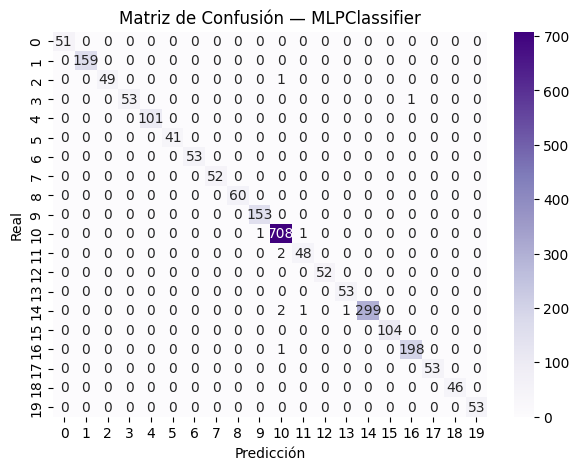

In [31]:
# Evaluación
print("📌 Perceptrón Multicapa (MLPClassifier)")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("F1 Score (macro):", f1_score(y_test, y_pred_mlp, average='macro'))
print("F1 Score (weighted):", f1_score(y_test, y_pred_mlp, average='weighted'))
print("\n", classification_report(y_test, y_pred_mlp))

# Matriz de confusión
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt='d', cmap='Purples')
plt.title("Matriz de Confusión — MLPClassifier")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.savefig("matriz_mlp.png")  # Guardar como PNG
plt.show()


#🔹 Paso 15 — Comparación entre modelos
📦 1. Reunir las métricas por modelo

In [33]:
y_pred_rf = y_pred  # si ya hiciste clf.predict(...) previamente


In [34]:
# Diccionario con métricas clave
resultados_modelos = {
    'Random Forest': {
        'Accuracy': accuracy_score(y_test, y_pred_rf),
        'F1 Macro': f1_score(y_test, y_pred_rf, average='macro'),
        'F1 Weighted': f1_score(y_test, y_pred_rf, average='weighted')
    },
    'Logistic Regression': {
        'Accuracy': accuracy_score(y_test, y_pred_log),
        'F1 Macro': f1_score(y_test, y_pred_log, average='macro'),
        'F1 Weighted': f1_score(y_test, y_pred_log, average='weighted')
    },
    'MLPClassifier': {
        'Accuracy': accuracy_score(y_test, y_pred_mlp),
        'F1 Macro': f1_score(y_test, y_pred_mlp, average='macro'),
        'F1 Weighted': f1_score(y_test, y_pred_mlp, average='weighted')
    }
}


📊 2. Convertir en tabla con pandas

In [35]:
import pandas as pd

df_comparacion = pd.DataFrame(resultados_modelos).T.round(4)
df_comparacion.sort_values('F1 Macro', ascending=False)


,Accuracy,F1 Macro,F1 Weighted
Random Forest,0.9971,0.9976,0.9971
MLPClassifier,0.9954,0.9955,0.9954
Logistic Regression,0.5953,0.6487,0.5790


💾 3. Exportar para usar en Overleaf

In [36]:
df_comparacion.to_csv("tabla_comparacion_modelos.csv", index=True)


🗒️ 4. Explicación tipo Markdown (para el notebook)

### 📌 Comparación de modelos

Se evaluaron tres modelos: Random Forest, Regresión Logística Multiclase y Perceptrón Multicapa (MLP). A continuación se presenta la tabla de métricas principales:

- **Accuracy**: proporción total de aciertos.
- **F1 Macro**: promedio del F1-score entre clases, útil si están desbalanceadas.
- **F1 Weighted**: promedio ponderado del F1-score según la frecuencia de cada clase.

👉 El modelo Random Forest mostró el mejor desempeño general, seguido por MLPClassifier.

*La tabla fue exportada como tabla_comparacion_modelos.csv para incluir en la presentación final.*
